# Demographic Data Anlyser 👥

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In this challenge you must analyze demographic data using Pandas. You are given a dataset of demographic data that was extracted from the 1994 Census database. Here is a sample of what the data looks like:

|    |   age | workclass        |   fnlwgt | education   |   education-num | marital-status     | occupation        | relationship   | race   | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   | salary   |
|---:|------:|:-----------------|---------:|:------------|----------------:|:-------------------|:------------------|:---------------|:-------|:-------|---------------:|---------------:|-----------------:|:-----------------|:---------|
|  0 |    39 | State-gov        |    77516 | Bachelors   |              13 | Never-married      | Adm-clerical      | Not-in-family  | White  | Male   |           2174 |              0 |               40 | United-States    | <=50K    |
|  1 |    50 | Self-emp-not-inc |    83311 | Bachelors   |              13 | Married-civ-spouse | Exec-managerial   | Husband        | White  | Male   |              0 |              0 |               13 | United-States    | <=50K    |
|  2 |    38 | Private          |   215646 | HS-grad     |               9 | Divorced           | Handlers-cleaners | Not-in-family  | White  | Male   |              0 |              0 |               40 | United-States    | <=50K    |
|  3 |    53 | Private          |   234721 | 11th        |               7 | Married-civ-spouse | Handlers-cleaners | Husband        | Black  | Male   |              0 |              0 |               40 | United-States    | <=50K    |
|  4 |    28 | Private          |   338409 | Bachelors   |              13 | Married-civ-spouse | Prof-specialty    | Wife           | Black  | Female |              0 |              0 |               40 | Cuba             | <=50K    |

## Importing data and checking key stats 📖
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from file

df = pd.read_csv('demo_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [2]:
# Check for missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [3]:
# How many of each salary are represented in this dataset? 
salary_count = df['salary'].value_counts()
print(salary_count)

<=50K    24720
>50K      7841
Name: salary, dtype: int64


In [4]:
# remove rows with "?" in the native-country column
# df = df[df['native-country'] != '?']
# df


## Analyse Insights 🕵️

#### How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.

In [5]:
race_count = df['race'].value_counts()
print(race_count)

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


#### What is the average age of men?

In [6]:
# What is the average age of men?

average_age_men = df[df['sex'] == 'Male']['age'].mean()

print('Average age of men:', average_age_men)

Average age of men: 39.43354749885268


#### The percentage of people who have a Bachelor's degree

In [7]:
total_count = len(df['education'])
bachelors_count = len(df[df['education'] == 'Bachelors'])
percentage_bachelors = round(((bachelors_count / total_count) * 100),1)

print('Percentage of people with Bachelor\'s degree:', percentage_bachelors ,"%")

Percentage of people with Bachelor's degree: 16.4 %


#### Percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

In [8]:
# Filter the data to include only individuals with advanced education
advanced_edu = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

# Calculate the percentage of individuals with advanced education who make more than 50K

percentage_advanced_edu_above_50k = (len(advanced_edu[advanced_edu['salary'] == '>50K']) / len(advanced_edu)) * 100

print("Percentage of people with advanced education making more than 50K:", percentage_advanced_edu_above_50k)

Percentage of people with advanced education making more than 50K: 46.535843011613935


#### Percentage of people without advanced education ~(`Bachelors`, `Masters`, or `Doctorate`) and making more than 50K?

In [9]:
# Filter the data to exclude individuals with advanced education
no_advanced_edu = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

# Calculate the percentage of individuals without advanced education who make more than 50K
percentage_no_advanced_edu_above_50k = (len(no_advanced_edu[no_advanced_edu['salary'] == '>50K']) / len(no_advanced_edu)) * 100

print("Percentage of people with advanced education making more than 50K:", percentage_no_advanced_edu_above_50k)

Percentage of people with advanced education making more than 50K: 17.3713601914639


#### Percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make less than 50K?

In [10]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make less than 50K?

# Calculate the percentage of individuals with advanced education who make less than 50K

percentage_advanced_edu_below_50k = (len(advanced_edu[advanced_edu['salary'] == '<=50K']) / len(advanced_edu)) * 100

print("Percentage of people with advanced education making less than 50K:", percentage_advanced_edu_below_50k)

Percentage of people with advanced education making less than 50K: 53.46415698838606


#### Percentage of people with no advanced education ~(`Bachelors`, `Masters`, or `Doctorate`) make less than 50K?

In [11]:
# What percentage of people with no advanced education (`Bachelors`, `Masters`, or `Doctorate`) make less than 50K?

# Calculate the percentage of individuals with no advanced education who make less than 50K

percentage_no_advanced_edu_below_50k = (len(no_advanced_edu[no_advanced_edu['salary'] == '<=50K']) / len(no_advanced_edu)) * 100

print("Percentage of people with advanced education making less than 50K:", percentage_no_advanced_edu_below_50k)

Percentage of people with advanced education making less than 50K: 82.6286398085361


#### The minimum number of hours a person works per week (hours-per-week feature)

In [12]:
# The describe() method will give more details on the hours-per-week column. This will include the min, we are going to calculate 

hour_stats = df['hours-per-week'].describe()
print(hour_stats)

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


In [13]:
# min_work_hours 

min_work_hours = df['hours-per-week'].min()
print('Minimum number of hours per week worked:', min_work_hours)

Minimum number of hours per week worked: 1


As we can see, the minimum value of 1 is indeed valid and not an error in the dataset. This suggests that there are some individuals who reported working only 1 hour per week. 

However, this is relatively uncommon, as the majority of individuals work between 40 and 45 hours per week (as shown by the **median** value of 40 and the interquartile range of 40-45).

#### What percentage of the people who work the minimum number of hours per week have a salary of >50K

In [14]:
num_min_workers = len(df[df['hours-per-week'] == min_work_hours])
num_rich_min_workers = len(df[(df['hours-per-week'] == min_work_hours) & (df['salary'] == '>50K')])

rich_percentage = (num_rich_min_workers / num_min_workers) * 100

print(f"Percentage of people who work the minimum number of hours per week and have a salary of >50K: {rich_percentage:.2f}%")

Percentage of people who work the minimum number of hours per week and have a salary of >50K: 10.00%


#### Country that has the highest percentage of people that earn >50K

In [15]:
# Select rows where salary is greater than 50K
high_earners = df[df['salary'] == '>50K']

# Group by country and count number of people in each group
grouped = high_earners.groupby('native-country')['native-country'].count()

# Count total number of people in each country
total = df.groupby('native-country')['native-country'].count()

# Calculate percentage of people who earn more than 50K in each country
percentages = (grouped / total) * 100

# Find country with highest percentage using panda method idxmax()
highest_earning_country = percentages.idxmax()
highest_percentage = round(percentages[highest_earning_country], 2)

print("The country with the highest percentage of people earning more than 50K is:", highest_earning_country, "with a percentage of", highest_percentage, "%")

The country with the highest percentage of people earning more than 50K is: Iran with a percentage of 41.86 %


#### Print percentage of people who earn more than 50K in each country

In [16]:
for country, percentage in percentages.items():
    print(f"{country}: {percentage:.2f}%")

?: 25.04%
Cambodia: 36.84%
Canada: 32.23%
China: 26.67%
Columbia: 3.39%
Cuba: 26.32%
Dominican-Republic: 2.86%
Ecuador: 14.29%
El-Salvador: 8.49%
England: 33.33%
France: 41.38%
Germany: 32.12%
Greece: 27.59%
Guatemala: 4.69%
Haiti: 9.09%
Holand-Netherlands: nan%
Honduras: 7.69%
Hong: 30.00%
Hungary: 23.08%
India: 40.00%
Iran: 41.86%
Ireland: 20.83%
Italy: 34.25%
Jamaica: 12.35%
Japan: 38.71%
Laos: 11.11%
Mexico: 5.13%
Nicaragua: 5.88%
Outlying-US(Guam-USVI-etc): nan%
Peru: 6.45%
Philippines: 30.81%
Poland: 20.00%
Portugal: 10.81%
Puerto-Rico: 10.53%
Scotland: 25.00%
South: 20.00%
Taiwan: 39.22%
Thailand: 16.67%
Trinadad&Tobago: 10.53%
United-States: 24.58%
Vietnam: 7.46%
Yugoslavia: 37.50%


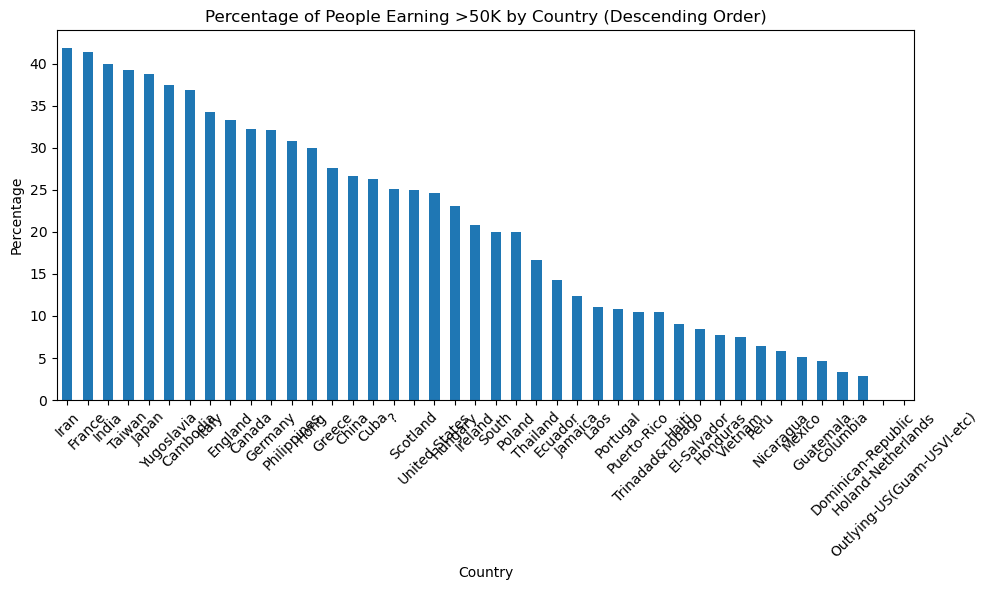

In [17]:
# Sort the percentages in descending order
percentages_sorted = percentages.sort_values(ascending=False)

# Find country with highest percentage
highest_earning_country = percentages_sorted.index[0]
highest_percentage = round(percentages_sorted.iloc[0], 2)

# Plotting the data
plt.figure(figsize=(10, 6))
percentages_sorted.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Percentage of People Earning >50K by Country (Descending Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Identify the most popular occupation for those who earn >50K in India.

In [67]:
# Select rows where salary is greater than 50K and native country is India
high_earning_indians = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]

# Group by occupation and count number of people in each group
grouped = high_earning_indians['occupation'].value_counts()

# Find the occupation with the highest count
most_popular_occupation = grouped.idxmax()

print("The most popular occupation for those who earn >50K in India is:", most_popular_occupation)

The most popular occupation for those who earn >50K in India is: Prof-specialty
